# Proyecto Simulacion Bloque 1

## Maximizando Inversiones

 **OBJETIVO GENERAL**
 
 Calculadora financiera que permite maximizar una inversión diversificada en 4 instrumentos financieros.
 
 **OBJETIVO ESPECIFICO**
 
 Plantear un modelo matemático que le permita al inversor maximizar sus rendimientos eligiendo la mejor opción de compra de cada instrumento financiero.

**INTEGRANTES**
- Francisco Alexander Sotomayor Pineda
- Nicolás Ramírez Castro
- Mónica Santiago Hernández

## Problema

Un inversionista tiene $50,000 usd$ y busca invertir su dinero en las siguientes opciones: ETFs, Acciones, Bonos de Gobierno y Criptomonedas por un año. Mínimo el 50% de nuestra inversión debe estar en en Bonos de Gobierno. Podemos invertir un Máximo de 15,000 en ETFs. Invertir en Criptomonedas es riesgoso, por lo que no se va a invertir mas del 3% del total de la inversión. Lo que se invierta en Acciones debe de ser al menos 10 veces lo que se invierta en Criptomonedas. Por último, lo que se invierta en ETFs y en Bonos de Gobierno debe ser al menos el 65% de la inversión total. La inversión será por un plazo de un año.

### Instrumentos utilizados
- Para las criptomonedas, optamos por invertir en **ETHEREUM**, por ser un proyecto serio y porque predecimos que tendrá un buen rendimiento en el próximo año.
- En acciones nos decantaremos por elegir un activo poco riesgoso y que tenga buenas predicciones para el próximo año, como es el caso de **Apple** (AAPL).
- Invertiremos en CETES a 364 días para cubrir el rubro de los bonos de gobierno.
- Para ETFs eligiremos el QQQ.

**RENDIMIENTOS POR INSTRUMENTO**

ETH = Comprando la criptomoneda al precio de hoy (1300 USD) se predice que dentro de un año alcance como mínimo los 2400 USD, dando un rendimiento esperado de 84%.

AAPL = Compramos el activo a un precio de 152.74USD y se prevee, según Trading Education, que la acción alcance, como mínimo 190USD en Septiembre del próximo año, lo que nos da un rendimiento del 24%.

BONOS DE GOB = 10.34% (La tasa de CETES a 364 días).

QQQ = 10.9% de acuerdo a Financhill.

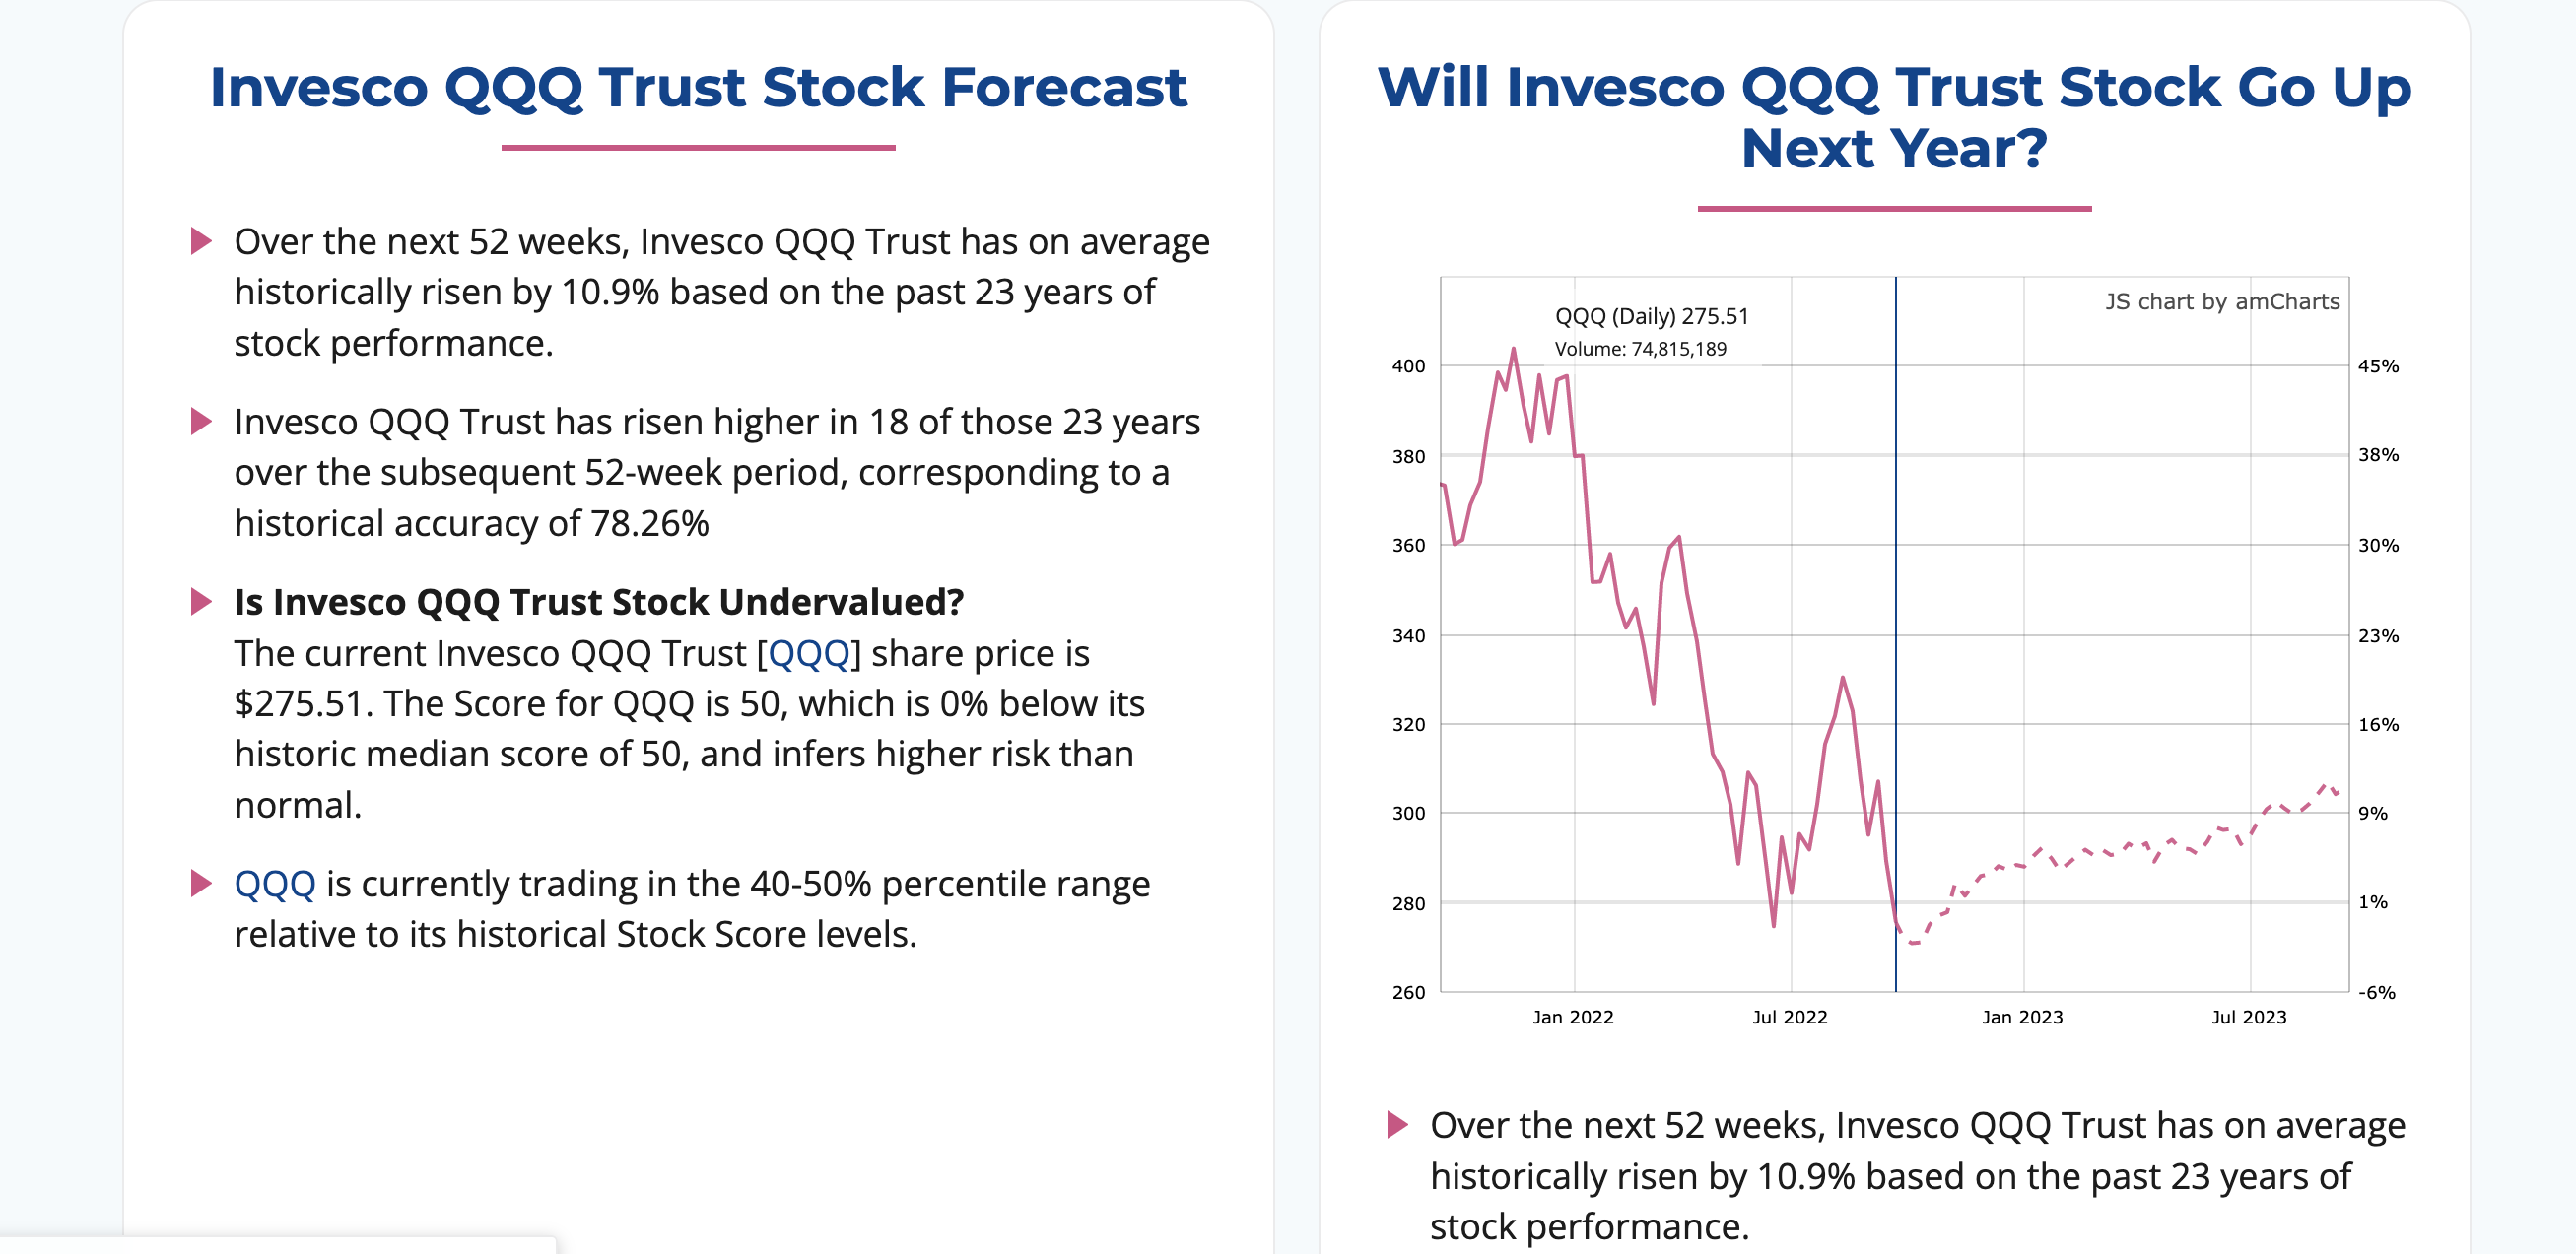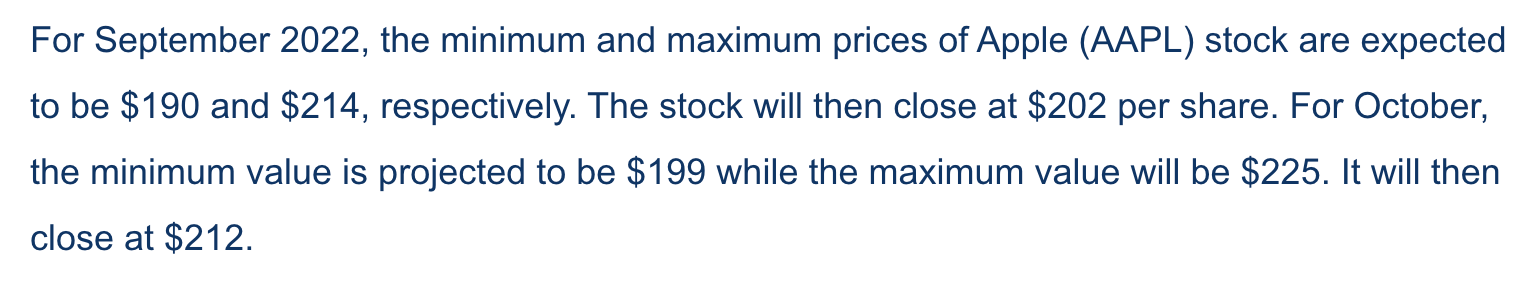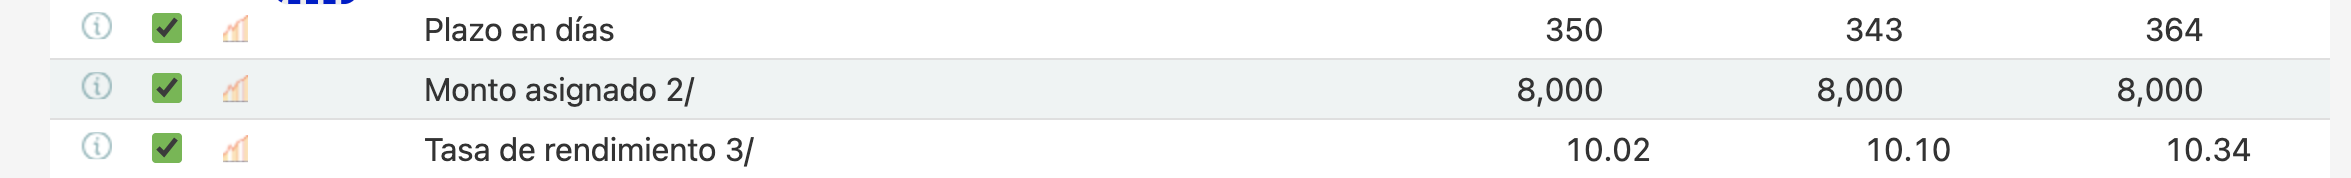

**Constantes**

$x_1$ = inversion en ETHEREUM

$x_2$ = Inversion en AAPL

$x_3$ = inversion en CETES a 364 días

$x_4$ = inversion en QQQ

**RESTRICCIONES**

$x_1+x_2+x_3+x_4\leq50,000$

$x_1\leq1,500$

$x_3\geq25,000$

$x_4\leq15,000$

$10x_1-x_2\leq0$

$x_3+x_4\geq 32,500 $


**FUNCION OBJETIVO**

maximizar

$0.84x_1+0.24x_2+0.1034x_3+0.109x_4$

**Deducción del modelo**

En este caso queremos maximizar una inversión hecha en cuatro activos financieros de distinta índole. Cada activo tiene una tasa de rendimiento esperada, que es la que está descrita en la función a maximizar. Sin embargo, hay distintos factores en el mercado que hacen que los activos sean de mayor o menor riesgo que otros. El riesgo es un limitante en los activos, es decir, te limita a la hora de invertir en ellos, pues nosotros queremos obtener una ganancia asegurada, no estamos dispuestos a perder nuestro dinero fácilmente. Los riesgos que representan los activos están descritos en las restricciones de nuestro problema. Es debido al riesgo que hay activos en los que no podemos invertir tanto dinero en ciertos activos, como lo son las criptomonedas. Por otra parte, hay activos que representan un riesgo mínimo, es por eso que se procura invertir la mayor parte del dinero en estos activos, tratando de mitigar el riesgo que representan los otros activos.


In [1]:
import scipy.optimize as opt
import numpy as np

In [2]:
c=-np.array([0.84,0.24,0.1034,0.109]) #coeficientes de la funcion objetivo
A=np.array([[1,1,1,1], #restriccion dinero total
           [1,0,0,0], #restriccion de ETH
           [0,0,-1,0],  #restriccion de CETES.
           [0,0,0,1],  #Restriccion de QQQ
           [10,-1,0,0], #Restriccion de inversion en Acciones y Cripto
           [0,0,-1,-1]]) #Restriccion de inversion en Bonos y Etf mayor al 65%
b=np.array([50000,1500,-25000,15000,0,-32500]) #limites de las restricciones
opt.linprog(c,A,b,)


     con: array([], dtype=float64)
     fun: -8502.499748744685
 message: 'Optimization terminated successfully.'
     nit: 11
   slack: array([ 4.49326995e-04,  1.15560896e-04,  1.32633128e-02,  7.50001326e+03,
        1.00000082e+03, -1.48284744e-06])
  status: 0
 success: True
       x: array([ 1499.99988444, 15999.99966772, 25000.01326331,  7499.9867352 ])

**RESULTADOS**

Se obtiene un beneficio optimo de 8,502.50USD (Rendimiento del 17%)

El inversor tendrá que destinar:

$1,499 USD a ETH

$15,999 USD a AAPL

$25,000 USD a CETES

$,7499 USD a QQQ

* La solucion condujo a una solucion factible

### Representación gráfica

In [8]:
import pandas as pd

pd.read_excel('Proyecto_optimizacion.xlsx')

,Inversión (usd),Ethereum,Acciones de Apple,CETES,QQQ (ETF),Total
0,50000,1499.00,15999.00,25000.0000,7499.000,49997.000
1,Rendimientos,0.84,0.24,0.1034,0.109,NaN
2,Beneficios de la inversión,1259.16,3839.76,2585.0000,817.391,8501.311


### Conclusiones

Como pudimos observar a lo largo del proyecto, la programación lineal tiene varias aplicaciones de optimización, en este caso utilizamos la programación lineal para poder maximizar las ganancias de un portafolio cuando tenemos ciertas restricciones. En finanzas, esas restricciones son riesgos que queremos mitigar. El equipo considera importante comprender y saber utilizar la programación lineal para poder adaptarla y aplicarla en nuestras respectivas áreas del conocimiento. Si bien pudimos llegar a los mismos resultados a través de otros métodos, análisis gráfico por ejemplo, la programación lineal nos ahorra muchísimo tiempo y esfuerzo, solamente basta con tener una buena comprensión del problema y saber como utilizar las distintas librerías que ofrece python. El equipo considera que es fundamental el manejo de la programación hoy en día. En el campo laboral, saber automatizar procesos a través de la programación es una ventaja grandísima que puede ahorrarle a nuestra compañía tiempo y dinero, dos activos de gran valor que pesan mucho en el mercado. Con el proyecto que realizamos hemos observado como aplicar las herramientas obtenidas en lo que va del curso a problemas reales del mundo laboral que, probablemente, algún día enfrentaremos.

## Referencias

Estructura de información (SIE, Banco de México). (2022). Retrieved September 25, 2022, from Banxico.org.mx website: https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=22&accion=consultarCuadro&idCuadro=CF107&locale=es

Trading Education Team. (2022, February 28). Apple (AAPL) Stock Price Prediction And Forecast 2022 – 2030. Retrieved September 25, 2022, from Trading-education.com website: https://trading-education.com/apple-stock-price-prediction

Where will Invesco QQQ Trust Stock Be In 1 Year? - Financhill. (2022). Retrieved September 25, 2022, from Financhill.com website: https://financhill.com/stock-forecast/qqq-stock-prediction